Make classification data and get it ready

In [112]:
import sklearn


In [113]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#Creaet circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


len(X),len(y)

(1000, 1000)

In [114]:
print(f"First 5 samples of X:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [115]:
#Make fataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


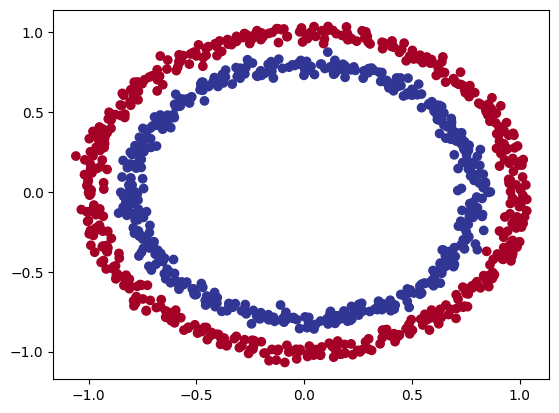

In [116]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often called referred to as toy dataset

##check input and output shapes

In [117]:
X.shape, y.shape

((1000, 2), (1000,))

In [118]:
#view the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of X:{X_sample} and the sample for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")


values for one sample of X:[0.75424625 0.23148074] and the sample for y:1
Shapes for one sample of X:(2,) and the same for y:()


Turn data intro tensors and create trani and test splits

In [119]:
import torch
torch.__version__

'2.3.1+cu121'

In [120]:
X.dtype

dtype('float64')

In [121]:
type(X)

numpy.ndarray

In [122]:
#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [123]:
type(X)

torch.Tensor

In [124]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2=20% of the data will be test and 80% will be train
                                                    random_state=42)

len(X_train), len(X_test),len(y_train), len(y_test)


(800, 200, 800, 200)

In [125]:
#2. building a model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available else "cpu"

device

'cuda'

In [126]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. create 2 nn.Linear layer capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,out_features=5) #takes in 2 features and upsacles to 5 features
        self.layer_2 = nn.Linear(in_features=5,out_features=1) #takesi in 5 features and downscales to 1 feature same shape as y
    
    #3. define a forward method theat outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1) 
    

#4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0
    



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [127]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [128]:
#Let's replicate the model above using n.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [129]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [130]:
#make some predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions:200, Shape:torch.Size([200, 1])
Length of test samples:200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#setup loss function and optimizer

which loss function or optimizer should we use?

Again this is problem specific.

for example for regression we might use MAE or MSE 

for classification we might use cross entropy loss


In [131]:
#setup loss function
loss_fn = nn.BCEWithLogitsLoss()

#setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [132]:
#calculate accuracy-out of 100 examples,what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


##3. Train Model


In [133]:
#view the first 5 output of the forward pass o the test data

model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [134]:
#use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [135]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [136]:
#find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [137]:
torch.cuda.manual_seed(42)


#set the number of epochs
epochs = 200

#put data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
    model_0.train()

    #forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    #calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_preds)
    
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()

    #testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


        #calculate test loss/accuracy
        test_loss = loss_fn(test_logits,
                             y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    #print ou what's happening

    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%")


Epoch:0 | Loss:0.69796, Acc:51.88% | Test loss:0.69440, Test acc:58.00%
Epoch:10 | Loss:0.69590, Acc:51.25% | Test loss:0.69305, Test acc:53.00%
Epoch:20 | Loss:0.69490, Acc:51.62% | Test loss:0.69254, Test acc:49.50%
Epoch:30 | Loss:0.69435, Acc:51.12% | Test loss:0.69236, Test acc:49.50%
Epoch:40 | Loss:0.69401, Acc:50.88% | Test loss:0.69232, Test acc:51.00%
Epoch:50 | Loss:0.69378, Acc:50.25% | Test loss:0.69234, Test acc:50.00%
Epoch:60 | Loss:0.69362, Acc:50.00% | Test loss:0.69239, Test acc:51.50%
Epoch:70 | Loss:0.69351, Acc:50.25% | Test loss:0.69246, Test acc:51.00%
Epoch:80 | Loss:0.69342, Acc:49.88% | Test loss:0.69254, Test acc:50.00%
Epoch:90 | Loss:0.69336, Acc:49.88% | Test loss:0.69262, Test acc:53.00%
Epoch:100 | Loss:0.69331, Acc:49.25% | Test loss:0.69271, Test acc:53.00%
Epoch:110 | Loss:0.69327, Acc:49.75% | Test loss:0.69279, Test acc:54.00%
Epoch:120 | Loss:0.69324, Acc:50.25% | Test loss:0.69286, Test acc:53.00%
Epoch:130 | Loss:0.69321, Acc:49.75% | Test loss:

In [138]:
## make predictions and evaluate the mdoel

import requests
from pathlib import Path

#download helper function rom learn pytorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")

else:
    print("Download helper_functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


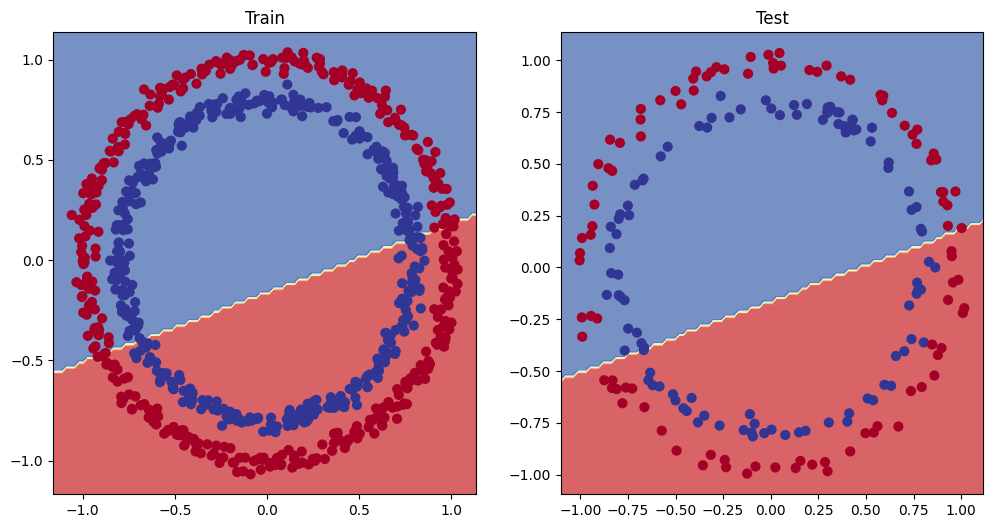

In [139]:
# plot decision boundary of th model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


5. Improving a model

* Add more layers-give the model more chances to learn about patters in the data

* Add more hidden units_ go from 5 hidden units to 10 hidden units

* fit for longer

* changing the activation functions

* change the learning rate

* change the loss function


In [140]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        #self.layer_4 = nn.Linear(in_features=20, out_features=1)
    
    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # z = self.layer_4(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
    

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [141]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

torch.cuda.manual_seed(42)


#set the number of epochs
epochs = 1000

#put data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
    model_1.train()

    #forward pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    #calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_preds)
    
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()

    #testing
    model_1.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


        #calculate test loss/accuracy
        test_loss = loss_fn(test_logits,
                             y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    #print ou what's happening

    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%")


Epoch:0 | Loss:0.69713, Acc:50.00% | Test loss:0.69594, Test acc:50.00%
Epoch:100 | Loss:0.69327, Acc:49.62% | Test loss:0.69334, Test acc:54.00%
Epoch:200 | Loss:0.69311, Acc:49.88% | Test loss:0.69357, Test acc:50.00%
Epoch:300 | Loss:0.69305, Acc:50.62% | Test loss:0.69384, Test acc:49.50%
Epoch:400 | Loss:0.69301, Acc:50.50% | Test loss:0.69407, Test acc:46.00%
Epoch:500 | Loss:0.69300, Acc:51.00% | Test loss:0.69425, Test acc:47.50%
Epoch:600 | Loss:0.69299, Acc:51.50% | Test loss:0.69438, Test acc:47.00%
Epoch:700 | Loss:0.69298, Acc:50.88% | Test loss:0.69447, Test acc:46.50%
Epoch:800 | Loss:0.69298, Acc:51.00% | Test loss:0.69453, Test acc:46.00%
Epoch:900 | Loss:0.69298, Acc:51.50% | Test loss:0.69458, Test acc:46.00%


In [142]:
## make predictions and evaluate the mdoel

import requests
from pathlib import Path

#download helper function rom learn pytorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")

else:
    print("Download helper_functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


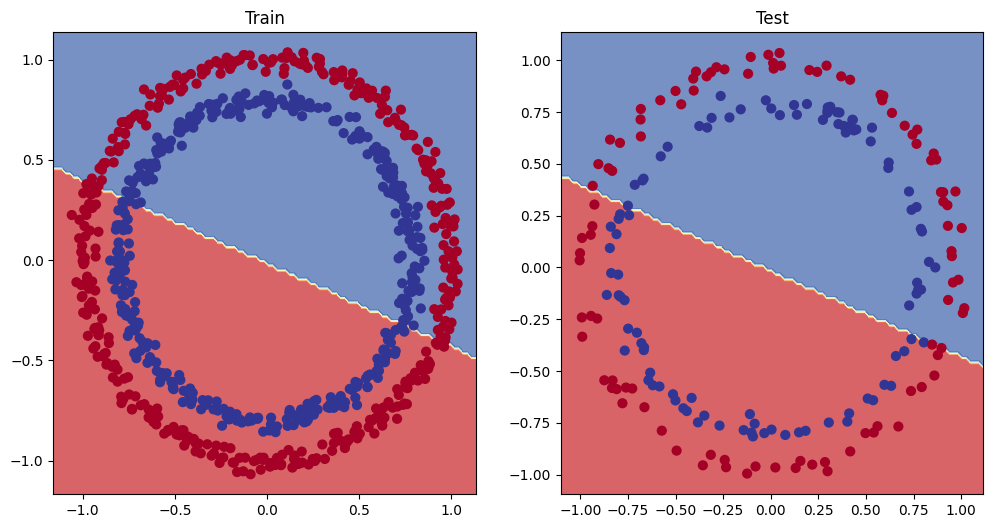

In [143]:
# plot decision boundary of th model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)


preparing daat to see if our model can fit a straight line

In [144]:
#create some data(same as notebook 01)
weight =0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression+bias
print(len(X_regression))
X_regression[:5],y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [145]:
#create train and test splits
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression), len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

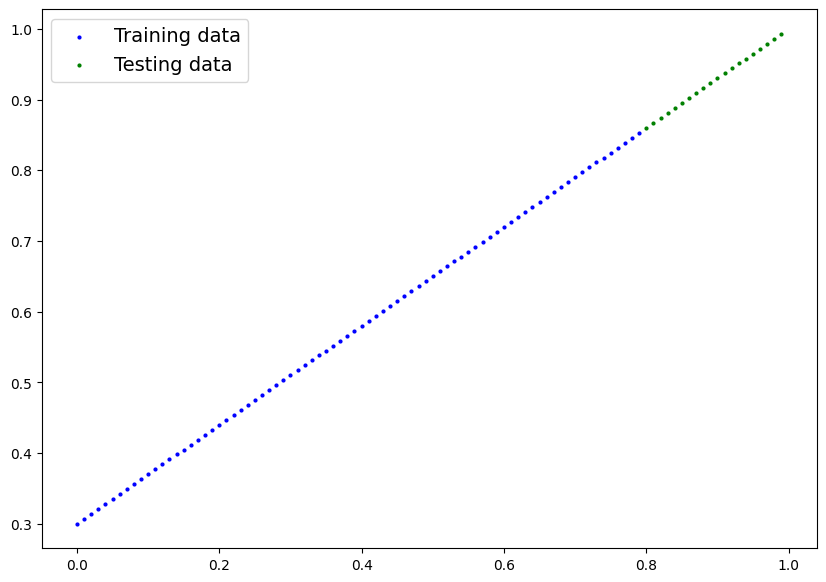

In [146]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [147]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

#adjusting 'model_1' to fit a straight line


In [148]:
model_2 = nn.Sequential(
    nn.Linear(1,10),
    nn.Linear(10,10),
    nn.Linear(10,1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [149]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.001)


In [150]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred,y_test_regression)

    if epoch % 50 ==0:
        print(f"epoch {epoch} | loss {loss:.5f} | test loss {test_loss:.5f}")

epoch 0 | loss 1.07564 | test loss 1.39990
epoch 50 | loss 0.87986 | test loss 1.20066
epoch 100 | loss 0.68688 | test loss 1.00367
epoch 150 | loss 0.48963 | test loss 0.80157
epoch 200 | loss 0.28051 | test loss 0.58641
epoch 250 | loss 0.14509 | test loss 0.40736
epoch 300 | loss 0.11738 | test loss 0.32169
epoch 350 | loss 0.10918 | test loss 0.28152
epoch 400 | loss 0.10362 | test loss 0.25969
epoch 450 | loss 0.09829 | test loss 0.24293
epoch 500 | loss 0.09299 | test loss 0.22989
epoch 550 | loss 0.08763 | test loss 0.21659
epoch 600 | loss 0.08220 | test loss 0.20316
epoch 650 | loss 0.07671 | test loss 0.18958
epoch 700 | loss 0.07114 | test loss 0.17568
epoch 750 | loss 0.06549 | test loss 0.16172
epoch 800 | loss 0.05974 | test loss 0.14755
epoch 850 | loss 0.05389 | test loss 0.13301
epoch 900 | loss 0.04794 | test loss 0.11794
epoch 950 | loss 0.04186 | test loss 0.10229


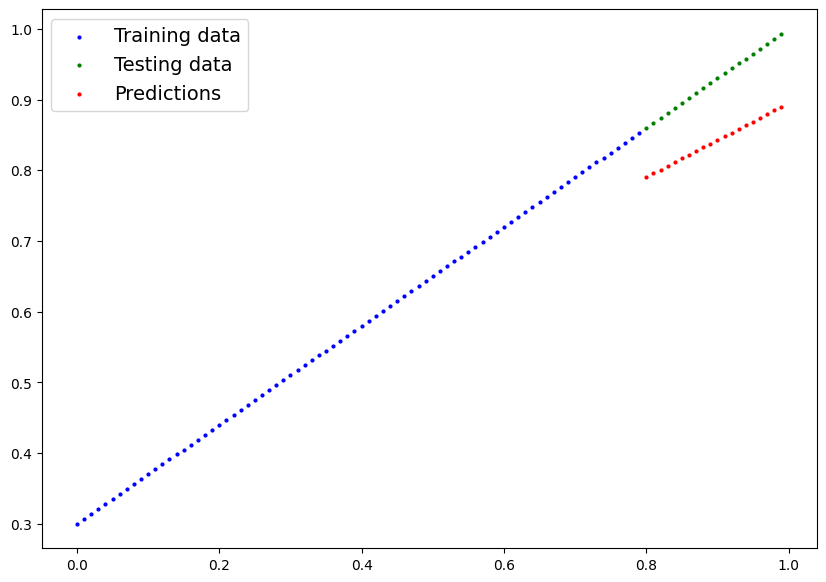

In [151]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)



plot_predictions(X_train_regression.cpu(),
                 y_train_regression.cpu(),
                 X_test_regression.cpu(),
                 y_test_regression.cpu(),
                 y_preds.cpu())






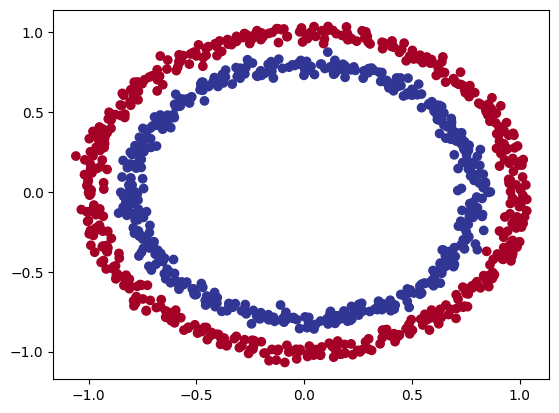

In [152]:
#recreate non'linear data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);


In [153]:
import torch
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [154]:
import torch
device = "cuda" if torch.cuda.is_available else "cpu"

device

'cuda'

In [155]:
 #build a model woth non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
       
    
    def forward(self, x):
        #where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [156]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() #how does it work though?
optimizer = torch.optim.SGD(model_3.parameters(),
                             lr=0.1)
#train
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred  = torch.round(torch.sigmoid(y_logits))


    loss = loss_fn(y_logits,y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred = y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred = test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.4f} | Acc:{acc:.2f}% | test Loss:{test_loss:.4f}, test Acc: {test_acc:.2f}%")

        


        


Epoch:0 | Loss:0.6929 | Acc:50.00% | test Loss:0.6932, test Acc: 50.00%
Epoch:100 | Loss:0.6912 | Acc:52.88% | test Loss:0.6910, test Acc: 52.50%
Epoch:200 | Loss:0.6898 | Acc:53.37% | test Loss:0.6894, test Acc: 55.00%
Epoch:300 | Loss:0.6879 | Acc:53.00% | test Loss:0.6872, test Acc: 56.00%
Epoch:400 | Loss:0.6852 | Acc:52.75% | test Loss:0.6841, test Acc: 56.50%
Epoch:500 | Loss:0.6810 | Acc:52.75% | test Loss:0.6794, test Acc: 56.50%
Epoch:600 | Loss:0.6751 | Acc:54.50% | test Loss:0.6729, test Acc: 56.00%
Epoch:700 | Loss:0.6666 | Acc:58.38% | test Loss:0.6632, test Acc: 59.00%
Epoch:800 | Loss:0.6516 | Acc:64.00% | test Loss:0.6476, test Acc: 67.50%
Epoch:900 | Loss:0.6236 | Acc:74.00% | test Loss:0.6215, test Acc: 79.00%
Epoch:1000 | Loss:0.5682 | Acc:87.75% | test Loss:0.5738, test Acc: 86.50%
Epoch:1100 | Loss:0.4815 | Acc:93.50% | test Loss:0.4993, test Acc: 90.50%
Epoch:1200 | Loss:0.3706 | Acc:97.75% | test Loss:0.4059, test Acc: 92.00%
Epoch:1300 | Loss:0.2546 | Acc:99.00%

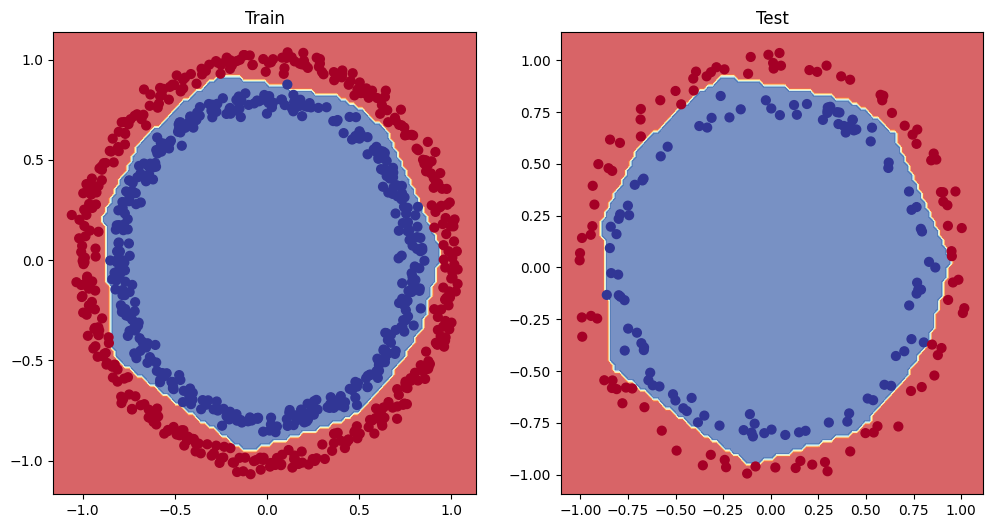

In [157]:
#mak epredictions
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds = y_preds[:10], y_test[:10]

#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3,X_test,y_test)

In [159]:
import torch
A = torch.arange(-10,10,1,dtype = torch.float32)

A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

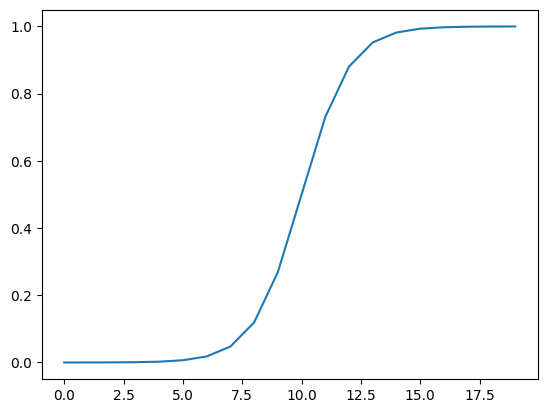

In [160]:
#custom sigmoid

def sigmoid(x):
    return 1/(1+torch.exp(-x))

plt.plot(torch.sigmoid(A))